In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def lvq_fit(train, target, lrate, b, max_epoch):
    #Lengkapi
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(train) if i not in train_idx])
    target = np.array([t for i, t in enumerate(target) if i not in train_idx])
    epoch = 0
    while epoch < max_epoch:
      for i, x in enumerate(train):
        distance = [sum((w - x) ** 2) for w in weight]
        min = np.argmin(distance)
        sign = 1 if target[i] == label[min] else -1
        weight[min] += sign * lrate * (x - weight[min])

      lrate *= b
      epoch += 1
    return weight, label


### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def lvq_predict(X, model):
    #Lengkapi
    center, label = model
    Y = []
    for x in X:
        d = [sum((c - x) ** 2) for c in center]
        Y.append(label[np.argmin(d)])
    return Y

### c) Fungsi Hitung Akurasi

In [4]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 1.0


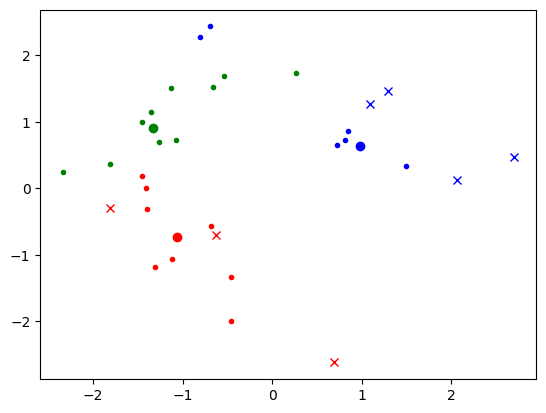

In [5]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

## Post-test

Pada post-test kali ini, teman-teman akan menggunakan Hand-written MNIST. Teman-teman harus bisa membangun model LVQ yang mampu mengklasifikasikan citra tulisan tangan ke bentuk sebenarnya.

**Unduh dataset dari google drive**

In [6]:
!gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

Downloading...
From: https://drive.google.com/uc?id=1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA
To: /content/data.csv
100% 18.3M/18.3M [00:00<00:00, 21.3MB/s]


**Representasi file csv ke citra asli**

In [7]:
data = pd.read_csv('data.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Teman-teman pada kali ini hanya diminta untuk melakukan klasifikasi 2 kelas. Hapus semua baris yang tidak berlabel 5 dan 6!

In [8]:
# Hapus semua kelas, kecuali kelas 5 dan 6, simpan ke variabel data_lite
data_lite = data[data['label'].isin([5, 6])]


data_lite.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


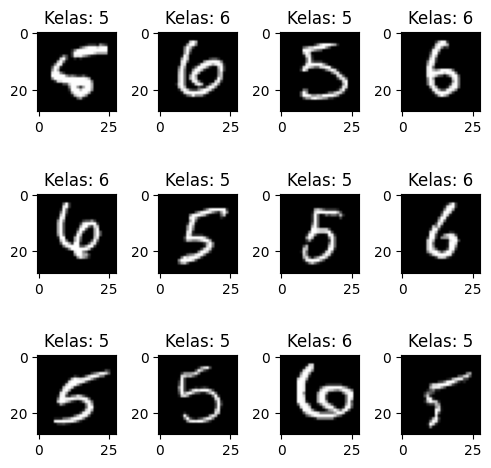

In [11]:
selected = data_lite.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for i, (index, row) in enumerate(selected.iterrows()):
    kelas = row['label']
    nilai_piksel = row.iloc[1:].values.astype(int)

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = i // kolom
    kolom_subplot = i % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [12]:
target = data_lite.iloc[:, 0]  # Kolom pertama adalah kolom kelas/target
data = data_lite.iloc[:, 1:]   # Sisanya adalah data


# Konversi data dan target ke dalam array NumPy, simpan ke variabel X dan y
X = data.values
y = target.values

Lakukan pelatihan menggunakan X_train dan uji dengan X_test. Set parameter lainnya agar teman-teman mendapatkan akurasi > 0,9.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #jangan ubah baris ini

model = lvq_fit(X_train, y_train, lrate=0.01, b=1, max_epoch=100)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.9459459459459459


### Pertanyaan

1.  Bagaimana arsitektur LVQ yang dibangun? Jelaskan jumlah input neuron dan output neuronnya!
2.  Bagaimana proses pelatihan LVQ agar bisa mencapai akurasi > 0,9? Jelaskan hasil tuning hyperparameternya!

Jawaban

1.  Neuron input pada LVQ sesuai dengan jumlah fitur dalam data. Jika data terdiri dari gambar 28x28 piksel, maka neuron input berjumlah 784, karena setiap neuron akan mewakili satu nilai piksel. Neuron output berjumlah sama dengan jumlah kelas yang ingin diprediksi. Misalnya, jika ada dua kelas (kelas 5 dan 6), maka ada dua neuron output, yang masing-masing mewakili satu kelas.
2.  Pelatihan LVQ dimulai dengan menginisialisasi neuron output secara acak. Setiap data yang diberikan akan mencari neuron output yang paling mirip, dan jika neuron yang benar (sesuai kelas data) jauh, neuron itu akan digeser lebih dekat ke data. Sebaliknya, jika neuron yang salah lebih dekat, neuron itu akan digeser lebih jauh. Pembaruan ini dipengaruhi oleh nilai learning rate, yang mengontrol seberapa besar pergeseran neuron. Untuk mencapai akurasi lebih dari 0,9, kita perlu mengatur beberapa parameter seperti learning rate, jumlah epoch, dan parameter b. Learning rate yang terlalu besar bisa membuat model melompat, sementara yang terlalu kecil bisa memperlambat pelatihan. Jumlah epoch yang cukup membantu model belajar dengan baik, sedangkan b mengatur seberapa besar pengaruh neuron terhadap data. Pengaturan yang tepat dari parameter ini akan membantu model belajar lebih baik dan mencapai akurasi tinggi.